# Data-5 Team-2
### Week-4

## Task 3

importing the libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

importing the playstore dataset

In [2]:
df1 = pd.read_csv("../Week 1/exported_data/googleplaystore_clean.csv")
df1

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.100000,159,19.0,10000,Free,0.0,Everyone
1,Coloring book moana,ART_AND_DESIGN,3.900000,967,14.0,500000,Free,0.0,Everyone
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.700000,87510,8.7,5000000,Free,0.0,Everyone
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.500000,215644,25.0,50000000,Free,0.0,Teen
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.300000,967,2.8,100000,Free,0.0,Everyone
...,...,...,...,...,...,...,...,...,...
9655,Sya9a Maroc - FR,FAMILY,4.500000,38,53.0,5000,Free,0.0,Everyone
9656,Fr. Mike Schmitz Audio Teachings,FAMILY,5.000000,4,3.6,100,Free,0.0,Everyone
9657,Parkinson Exercices FR,MEDICAL,4.172966,3,9.5,1000,Free,0.0,Everyone
9658,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.500000,114,Varies with device,1000,Free,0.0,Mature 17+


importing the reviews dataset

In [3]:
df2 = pd.read_csv("muhammed_exported/reviews_with_scores.csv")
df2

,Unnamed: 0,App,Translated_Review,affin_scores,np_scores
0,0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,13.0,3
1,1,10 Best Foods for You,This help eating healthy exercise regular basis,4.0,1
2,2,10 Best Foods for You,,0.0,0
3,3,10 Best Foods for You,Works great especially going grocery store,3.0,2
4,4,10 Best Foods for You,Best idea us,3.0,1
...,...,...,...,...,...
64290,64290,Houzz Interior Design Ideas,,0.0,0
64291,64291,Houzz Interior Design Ideas,,0.0,0
64292,64292,Houzz Interior Design Ideas,,0.0,0
64293,64293,Houzz Interior Design Ideas,,0.0,0


merging both datasets

In [4]:
df = pd.merge(df1, df2, how='inner', on="App")
# dropping the column that contained the index for the reviews dataset
df =  df.drop(labels='Unnamed: 0', axis=1)
df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Translated_Review,affin_scores,np_scores
0,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,A kid's excessive ads. The types ads allowed a...,-2.0,-1
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,It bad >:(,-3.0,-1
2,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,like,2.0,1
3,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,,0.0,0
4,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,I love colors inspyering,3.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
61551,A+ Gallery - Photos & Videos,PHOTOGRAPHY,4.5,223941,Varies with device,10000000,Free,0.0,Everyone,,0.0,0
61552,A+ Gallery - Photos & Videos,PHOTOGRAPHY,4.5,223941,Varies with device,10000000,Free,0.0,Everyone,,0.0,0
61553,A+ Gallery - Photos & Videos,PHOTOGRAPHY,4.5,223941,Varies with device,10000000,Free,0.0,Everyone,Too much ads,0.0,0
61554,A+ Gallery - Photos & Videos,PHOTOGRAPHY,4.5,223941,Varies with device,10000000,Free,0.0,Everyone,Just allow time ...,1.0,0


listing the paid apps with highest affin score

In [5]:
df_top = df[df["Type"] != "Free"].drop_duplicates().sort_values(by=["affin_scores"], ascending=False).reset_index(drop=True).iloc[:5,:]
df_top

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Translated_Review,affin_scores,np_scores
0,Dr. Panda & Toto's Treehouse,FAMILY,4.4,3396,9.5,50000,Paid,3.99,Everyone,I love I love I love I love love love I like c...,39.0,14
1,Essential Anatomy 3,MEDICAL,4.1,1533,42.0,50000,Paid,11.99,Mature 17+,Amazing backed excellent tech support team! Th...,23.0,4
2,Beautiful Widgets Pro,PERSONALIZATION,4.2,97890,14.0,1000000,Paid,2.49,Everyone,Ghost adventure I like it.. If widget could st...,20.0,7
3,Golfshot Plus: Golf GPS,SPORTS,4.1,3387,25.0,50000,Paid,29.99,Everyone,I hoping help. My golf season starting. I used...,18.0,5
4,HD Widgets,PERSONALIZATION,4.3,58617,26.0,1000000,Paid,0.99,Everyone,Pretty nice app. I bought years ago pretty lac...,17.0,8


listing the paid apps with lowest affin score

In [36]:
df_worst = df[df["Type"] != "Free"].drop_duplicates().sort_values(by=["affin_scores"]).reset_index(drop=True).iloc[:5,:]
df_worst

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Translated_Review,affin_scores,np_scores
0,BIG Launcher,PERSONALIZATION,4.3,881,5.9,10000,Paid,9.99,Everyone,Very disappointed discover purchase serious fl...,-10.0,-4
1,Beautiful Widgets Pro,PERSONALIZATION,4.2,97890,14.0,1000000,Paid,2.49,Everyone,Still work Not sure main features work? It upd...,-6.0,-1
2,Beautiful Widgets Pro,PERSONALIZATION,4.2,97890,14.0,1000000,Paid,2.49,Everyone,I uninstalled reinstalled still nothing. Sucks...,-6.0,-1
3,HD Widgets,PERSONALIZATION,4.3,58617,26.0,1000000,Paid,0.99,Everyone,I've used Note 4 problem since I bought Note 8...,-6.0,-2
4,Call of Duty:Black Ops Zombies,GAME,4.2,13004,46.0,100000,Paid,6.99,Teen,The problem online game caught little hype aff...,-5.0,-2


creating the a new data frame that contains the top and worst apps

In [54]:
top_and_worst = pd.concat([df_top, df_worst.sort_values(by=["affin_scores"], ascending=False)])
top_and_worst

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Translated_Review,affin_scores,np_scores
0,Dr. Panda & Toto's Treehouse,FAMILY,4.4,3396,9.5,50000,Paid,3.99,Everyone,I love I love I love I love love love I like c...,39.0,14
1,Essential Anatomy 3,MEDICAL,4.1,1533,42.0,50000,Paid,11.99,Mature 17+,Amazing backed excellent tech support team! Th...,23.0,4
2,Beautiful Widgets Pro,PERSONALIZATION,4.2,97890,14.0,1000000,Paid,2.49,Everyone,Ghost adventure I like it.. If widget could st...,20.0,7
3,Golfshot Plus: Golf GPS,SPORTS,4.1,3387,25.0,50000,Paid,29.99,Everyone,I hoping help. My golf season starting. I used...,18.0,5
4,HD Widgets,PERSONALIZATION,4.3,58617,26.0,1000000,Paid,0.99,Everyone,Pretty nice app. I bought years ago pretty lac...,17.0,8
4,Call of Duty:Black Ops Zombies,GAME,4.2,13004,46.0,100000,Paid,6.99,Teen,The problem online game caught little hype aff...,-5.0,-2
1,Beautiful Widgets Pro,PERSONALIZATION,4.2,97890,14.0,1000000,Paid,2.49,Everyone,Still work Not sure main features work? It upd...,-6.0,-1
2,Beautiful Widgets Pro,PERSONALIZATION,4.2,97890,14.0,1000000,Paid,2.49,Everyone,I uninstalled reinstalled still nothing. Sucks...,-6.0,-1
3,HD Widgets,PERSONALIZATION,4.3,58617,26.0,1000000,Paid,0.99,Everyone,I've used Note 4 problem since I bought Note 8...,-6.0,-2
0,BIG Launcher,PERSONALIZATION,4.3,881,5.9,10000,Paid,9.99,Everyone,Very disappointed discover purchase serious fl...,-10.0,-4


plotting the new data frame

Text(0.5, 1.0, 'Top 5 and worst 5 Apps According to Their Affin Score')

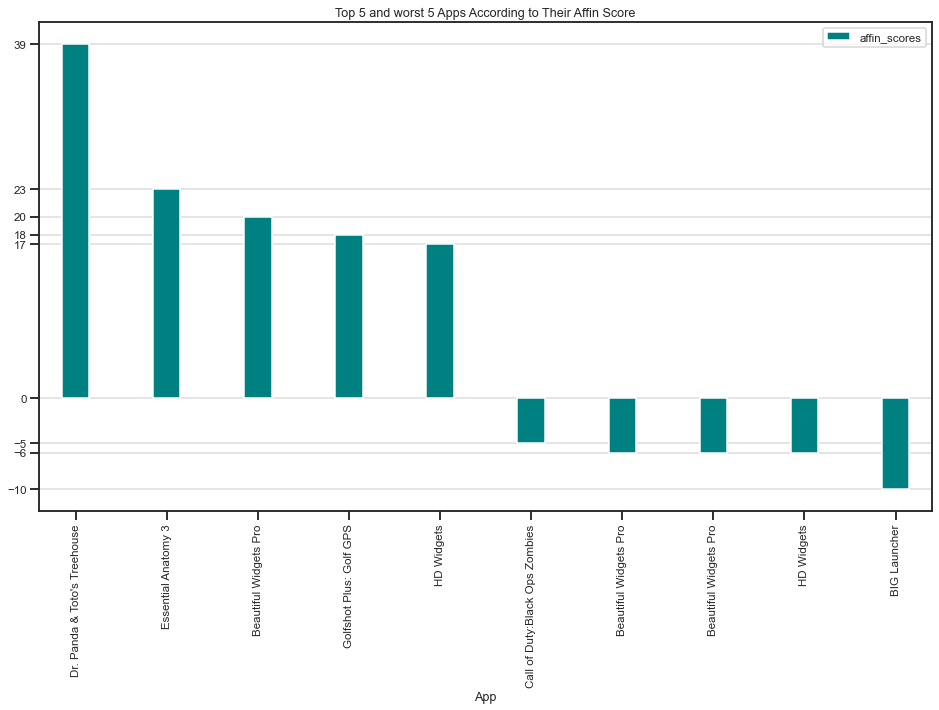

In [78]:
top_and_worst.plot(kind='bar', x="App", y="affin_scores", 
                   yticks=[-10, -6, -5, 0, 17, 18, 20, 23, 39], figsize=(16,9), color='teal', width=0.3)
plt.grid(color = 'black', alpha=0.1, linewidth = 2, axis='y')
plt.title("Top 5 and worst 5 Apps According to Their Affin Score")

## Task 4

listing the categories according to their affin scores

In [ ]:
df_ranked = df.groupby(['Category'])['affin_scores'].sum().sort_values(ascending=False).reset_index(drop=False)
df_ranked

,Category,affin_scores
0,GAME,22370.0
1,HEALTH_AND_FITNESS,8197.0
2,FAMILY,6118.0
3,MEDICAL,3915.0
4,PRODUCTIVITY,3896.0
5,EDUCATION,3388.0
6,DATING,3380.0
7,SPORTS,3147.0
8,PHOTOGRAPHY,3114.0
9,TRAVEL_AND_LOCAL,3077.0


plotting the ranking

Text(0.5, 1.0, 'Category Rankings According To Their Affin Score')

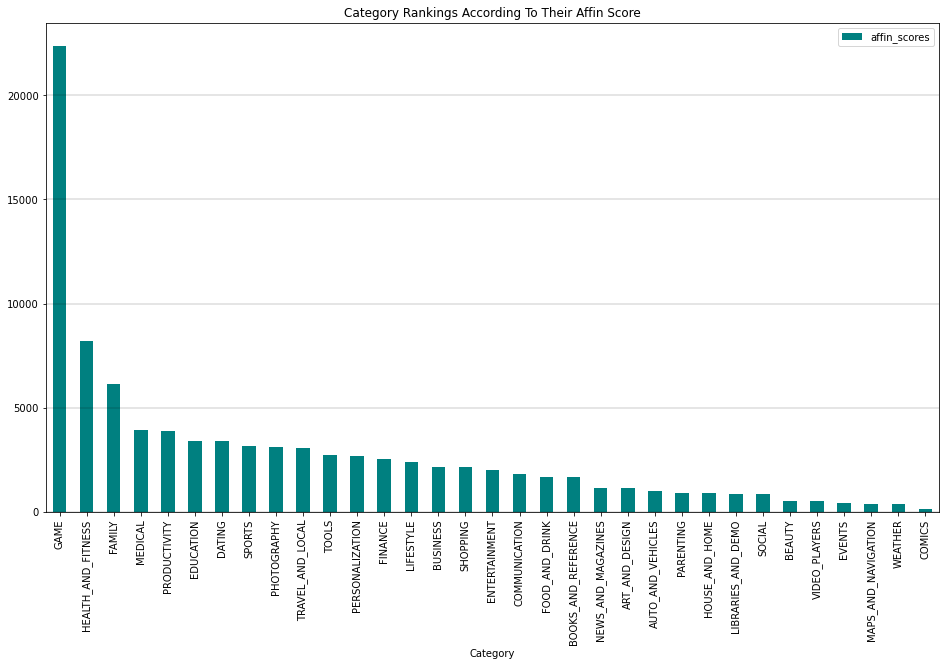

In [ ]:
df_ranked.plot(kind='bar', x="Category", y="affin_scores", color='teal', figsize=(16, 9))
plt.grid(color = 'black', alpha=0.1, linewidth = 2, axis='y')
plt.title("Category Rankings According To Their Affin Score")